In [43]:
#IMPORT ALL THE LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.tree import DecisionTreeRegressor

from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score







In [44]:
data1=pd.read_csv('C:\\Users\\KIIT_Intern\\Desktop\\GPS_DATA_Maxim\\go_track_trackspoints.csv')
data2=pd.read_csv('C:\\Users\\KIIT_Intern\\Desktop\\GPS_DATA_Maxim\\go_track_tracks.csv')
data2.head()

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN
1,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN
2,3,1,13.560101,0.067699,0.918,3,0,0,2,NaN
3,4,1,19.766679,0.389544,7.700,3,0,0,2,NaN
4,8,0,25.807401,0.154801,3.995,2,0,0,1,NaN


In [45]:
df=pd.merge(data1, data2, on='id', how='right')
df.head()


,id,latitude,longitude,track_id,time_x,id_android,speed,time_y,distance,rating,rating_bus,rating_weather,car_or_bus,linha
0,1,-10.939341,-37.062742,1.0,9/13/2014 7:24,0,19.210586,0.138049,2.652,3,0,0,1,NaN
1,2,-10.939341,-37.062742,1.0,9/13/2014 7:24,0,30.848229,0.171485,5.290,3,0,0,1,NaN
2,3,-10.939324,-37.062765,1.0,9/13/2014 7:24,1,13.560101,0.067699,0.918,3,0,0,2,NaN
3,4,-10.939211,-37.062843,1.0,9/13/2014 7:24,1,19.766679,0.389544,7.700,3,0,0,2,NaN
4,8,-10.938448,-37.062000,1.0,9/13/2014 7:25,0,25.807401,0.154801,3.995,2,0,0,1,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 162
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              163 non-null    int64  
 1   latitude        96 non-null     float64
 2   longitude       96 non-null     float64
 3   track_id        96 non-null     float64
 4   time_x          96 non-null     object 
 5   id_android      163 non-null    int64  
 6   speed           163 non-null    float64
 7   time_y          163 non-null    float64
 8   distance        163 non-null    float64
 9   rating          163 non-null    int64  
 10  rating_bus      163 non-null    int64  
 11  rating_weather  163 non-null    int64  
 12  car_or_bus      163 non-null    int64  
 13  linha           80 non-null     object 
dtypes: float64(6), int64(6), object(2)
memory usage: 19.1+ KB


In [47]:
df.drop(['id','linha','time_x','id_android'],1,inplace=True)


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 162
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        96 non-null     float64
 1   longitude       96 non-null     float64
 2   track_id        96 non-null     float64
 3   speed           163 non-null    float64
 4   time_y          163 non-null    float64
 5   distance        163 non-null    float64
 6   rating          163 non-null    int64  
 7   rating_bus      163 non-null    int64  
 8   rating_weather  163 non-null    int64  
 9   car_or_bus      163 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 14.0 KB


In [49]:
df.shape


(163, 10)

In [50]:
df

,latitude,longitude,track_id,speed,time_y,distance,rating,rating_bus,rating_weather,car_or_bus
0,-10.939341,-37.062742,1.0,19.210586,0.138049,2.652,3,0,0,1
1,-10.939341,-37.062742,1.0,30.848229,0.171485,5.290,3,0,0,1
2,-10.939324,-37.062765,1.0,13.560101,0.067699,0.918,3,0,0,2
3,-10.939211,-37.062843,1.0,19.766679,0.389544,7.700,3,0,0,2
4,-10.938448,-37.062000,1.0,25.807401,0.154801,3.995,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...
158,NaN,NaN,NaN,30.051732,0.218756,6.574,2,0,0,1
159,NaN,NaN,NaN,30.173788,0.255387,7.706,3,0,0,1
160,NaN,NaN,NaN,1.153772,0.013001,0.015,1,3,2,2
161,NaN,NaN,NaN,0.843223,0.007116,0.006,3,1,2,2


In [51]:
df.isnull().sum().sum()

201

Text(0.5, 1, 'Number of Missing Values')

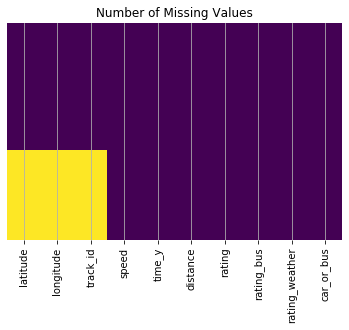

In [52]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.grid()
plt.title("Number of Missing Values")

In [53]:
import statistics

print(statistics.mode(df["latitude"]))
k=df["latitude"].fillna(-10.94169743)


-10.94169743


In [54]:
df=df.fillna(method="pad")
df.shape
df


,latitude,longitude,track_id,speed,time_y,distance,rating,rating_bus,rating_weather,car_or_bus
0,-10.939341,-37.062742,1.0,19.210586,0.138049,2.652,3,0,0,1
1,-10.939341,-37.062742,1.0,30.848229,0.171485,5.290,3,0,0,1
2,-10.939324,-37.062765,1.0,13.560101,0.067699,0.918,3,0,0,2
3,-10.939211,-37.062843,1.0,19.766679,0.389544,7.700,3,0,0,2
4,-10.938448,-37.062000,1.0,25.807401,0.154801,3.995,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...
158,-10.918492,-37.053584,4.0,30.051732,0.218756,6.574,2,0,0,1
159,-10.918492,-37.053584,4.0,30.173788,0.255387,7.706,3,0,0,1
160,-10.918492,-37.053584,4.0,1.153772,0.013001,0.015,1,3,2,2
161,-10.918492,-37.053584,4.0,0.843223,0.007116,0.006,3,1,2,2


In [55]:
X=np.array(df.drop(['car_or_bus'],1)) #independent variables (input)
Y=np.array(df['car_or_bus']) #output variables


C:\Users\KIIT_Intern\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.869118 (0.167956)
LDA: 0.795588 (0.188056)
KNN: 0.694853 (0.167552)
CART: 0.794485 (0.162502)
NB: 0.825735 (0.180291)
SVM: 0.638971 (0.205039)


C:\Users\KIIT_Intern\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\KIIT_Intern\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\KIIT_Intern\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\KIIT_Intern\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no eff

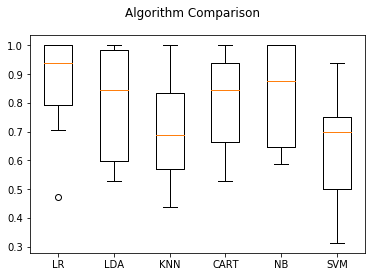

In [57]:
# preparing configuration for cross validation test harness
seed = 7
# preparing models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluating each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplotting algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()